# Load Library

In [1079]:
#Basic scientific python libs
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import re
import random
from math import radians, cos, sin, asin, sqrt
from haversine import haversine, Unit
import collections
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )

# Load source data file

In [1080]:
# load csv files
missing_data = pd.read_csv("C:/Users/SENMS/Desktop/5196/31268102_missing_data.csv")
dirty_data = pd.read_csv("C:/Users/SENMS/Desktop/5196/31268102_dirty_data.csv")
outlier_data = pd.read_csv("C:/Users/SENMS/Desktop/5196/31268102_outlier_data.csv")
warehouse = pd.read_csv("C:/Users/SENMS/Desktop/5196/warehouses.csv")

## Data Auditing: 
This first step is mainly to identify the types of anomalies that reduce the data
quality. Data auditing is about programmatically checking the data using some validation rules that
are pre-specified, and then creating a report of the quality of the data and its problems. We often
apply some statistical tests in this step for examining the data.

# 1 Identify and analyze source data

#### Which we do first?
1. Syntactic Anomalies: describe characteristics concerning the format and values used for representation of the entities. Syntactic anomalies such as: lexical errors, domain format errors, syntactical error and irregularities.

2. Semantic Anomalies: hinder the data collection from being a comprehensive and non-redundant representation of the mini-world. These types of anomalies include: Integrity constraint violations, contradictions, duplicates and invalid tuples

3. Coverage Anomalies: decrease the amount of entities and entity properties from the mini-world that are represented in the data collection. Coverage anomalies are categorized as: missing values and missing tuples

## 1.1 Identify the characteristic of each Observations
### Type = object(string):
- `order_id`: from the records, we identify the pattern for the `order_id` is construct by uppercase "ORD" followed with 6 digits form 000001 to 999999. 
    - the `order_id` is unorderd(without `AES` or `DES`).
    - variable type is `object(string)`.
<br><br>

- `customer_id`: from the records, we identify the pattern for the `customer_id` is construct by uppercase "ID" followed with 10 digits from 0000000001 to 999999999.
    - the `customer_id` is unorderd(without `AES` or `DES`).
    - variable type is `object(string)`.
<br><br>

- `date`: form the recrods, we identify the pattern for the `data` is YYYY-MM-DD, construct by 4 digits with "-" then 2 digits with "-" then 2 digits.
    - the `date` is unorderd(without `AES` or `DES`).
    - variable type is `object(string)` or should we consider as `Date`.
    - Year should be within `2019`, 2019 `is not a leap year`.
    - Month should between 01-12.
    - Day should between 01 - 28/30/31.
<br><br>

- `nearest_warehouse`: from the records, we identify the pattern for the `nearest_warehouse` is location indicator which must use uppercase for only first character(Axxxxxx), AxxxBxx or xxxxxx is not allowed.
    - the `nearest_warehouse` is unorderd(without `AES` or `DES`).
    - variable type is `object(string)`.
<br><br>

- `shopping_cart`: from the records, we identify the pattern for the `shopping_cart` is list contain ('items', amount), 
  - <b>item cannot be empty and amount cannot be =< 0.</b>
    - the `nearest_warehouse` dont require to be ordered. 
    - variable type is `object(string)`.
    - 'item' type should be string.
    - 'amount' type should be integer(cannot be float) && cannot equal or less than 0.
<br><br>
    
- `season`: from the records, we identify the pattern for the `season` is season indicator which must use uppercase for only first character(Axxxxxx), AxxxBxx or xxxxxx is not allowed.
  - <b>the variable should be in the set["Spring","Summer","Autumn","Winter"]</b>.
    - `season` is unordered(with 'AES' or 'DES').
    - variables type is `object(string)`.
<br><br>
    
- `latest_customer_review`: from the records, we identify the pattern for the `latest_customer_review` is construct by digits, letters and punctuation.
  - <b>the variable can be empty</b>.
    - `latest_customer_review` no need to orderd.
    - variables type is `object(string)`.
   
### Type = int64(int):
- `coupon_discount`: from the records, we identify the pattern for the `coupon_discount` is construct with only digits[0-9]{2}. 
  - <b>the variable should be in the set [0,5,10,15,25] and cannot be less than 0</b>.
    - `coupon_discount` is unordered(with 'AES' or 'DES').
    - variables type is `int64`.
<br><br>
    
    
### Type = float64(float):    
- `order_price`: from the records, we identify the pattern for the `order_price` is construct by digits with '.' and digits(for decimal number).
  - <b>the variable cannot be less than 0</b>.
    - the `order_price` is unordered(without 'AES' or 'DES').
    - variables type is `int64`. which shoule be cover to `float` to allowed decimal number for price.
<br><br>
    
- `delivery_charges`: from the records, we identify the pattern for the `delivery_charges` is construct by digits with '.' and digits
 - <b>the varibale cannot be less than 0</b>.
    - the `delivery_charges` is unordered(with 'AES' or 'DES').
    - varibales type is `float64`.
<br><br>
    
- `customer_lat`: from the records, we identify the pattern for the `customer_lat` is construct by '-' followed with digits and '.' then digits. 
  - <b>for the latitude of Australia, the range shoule be approximately within -11.0 to -44.0, the variable cannot be `positive`</b>.
    - `customer_lat` is unordered(with 'AES' or 'DES').
    - variables type is `float64`.
<br><br>
    
- `customer_long`: from the records, we identify the pattern for the `customer_long` is construct with digits and '.' then digits. 
  - <b>for the latitude of Australia, the range shoule be approximately within 110.0 to 156.0, the variable cannot be `negtive`</b>.
    - `customer_lat` is unordered(with 'AES' or 'DES').
    - variables type is `float64`.
<br><br>
       
- `order_total`: from the records, we identify the pattern for the `order_total` is construct by digits and '.' and digits. 
  - <b>the variable and cannot be less than and equal to 0</b>.
    - `order_total` is unordered(with 'AES' or 'DES').
    - variables type is `float64`.
<br><br>
    
- `distance_to_nearest_warehouse`: from the records, we identify the pattern for the `distance_to_nearest_warehouse` is construct by digits and '.' and digits.
  - <b>the variable cannot equal to or less than 0</b>.
    - `distance_to_nearest_warehouse` unordered(with 'AES' or 'DES').
    - variables type is `float64`.
<br><br>
    
 
### Type = bool(boolean):    
- `is_expedited_delivery`: from the records, we identify the pattern for the `is_expedited_delivery` is status indicator which must use uppercase for only first character(Fxxxx), TxRx or xxxxx is not allowed.
  - <b>the variable should be in the set[True, False]</b>.
    - `is_expedited_delivery` is no need to orderd
    - variables type is `bool`.
<br><br>    
    
- `is_happy_customer`: from the records, we identify the pattern for the `is_happy_customer` is status indicator which must use uppercase for only first character(Fxxxx), TxRx or xxxxx is not allowed.
  - <b>the variable should be in the set[True, False]</b>.
    - `is_happy_customer` is no need to orderd
    - variables type is `bool`.

In [19]:
# display data frame
dirty_data.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD036118,ID6167417968,2019-11-20,Nickolson,"[('iStream', 2), ('pearTV', 2), ('iAssist Line...",17370,99.66,-37.812016,144.970392,25,13127.16,Spring,True,0.7361,nice phone has some third-party software optio...,True
1,ORD320598,ID3155747268,2019-04-06,thompson,"[('Olivia x460', 1), ('pearTV', 1), ('Alcon 10...",16635,68.76,-37.799367,144.960041,0,16703.76,Autumn,True,1.8697,one star poor quality,False
2,ORD398951,ID0775933250,2019-12-02,Thompson,"[('Toshika 750', 2), ('iStream', 1), ('Thunder...",15610,99.30,144.959140,-37.805915,0,15709.30,Summer,True,1.3012,great fast shipping. great product,True
3,ORD161295,ID2398373283,2019-02-13,Thompson,"[('Alcon 10', 1), ('Lucent 330S', 2), ('Thunde...",15770,64.35,-37.819192,144.934042,15,13468.85,Summer,False,1.3560,oops! ordered in error. trying to buy a basic ...,False
4,ORD103428,ID6167278761,2019-10-24,Thompson,"[('Toshika 750', 1), ('Alcon 10', 2), ('pearTV...",28530,72.60,-37.815057,144.952147,5,27176.10,Spring,False,0.5195,... who operates a log skidder and it has been...,True


In [20]:
# display data structure(variable/instance types)
dirty_data.info()
## 500 entries with 500 Non-Null Count, there is no null value appreas in the table.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [887]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [205]:
missing_data.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD044475,ID4336550012,2019-10-31,Thompson,"[('iStream', 1), ('iAssist Line', 1)]",2375.0,84.90,-37.798448,144.959012,10,2222.40,Spring,False,1.9003,just fine personal phone seems to be working j...,1.0
1,ORD470983,ID0202772800,2019-10-01,Thompson,"[('iStream', 2), ('Toshika 750', 2), ('Alcon 1...",26840.0,NaN,-37.805253,144.926063,25,20201.91,Spring,False,2.0237,already dead! broke after 2 months!,0.0
2,ORD210360,ID0241807196,2019-12-09,Bakers,"[('pearTV', 2), ('Toshika 750', 1), ('Alcon 10...",25890.0,72.95,-37.813311,144.988504,10,23373.95,Summer,False,0.6973,"buy factory unlocked to many at&t apps,the pro...",1.0
3,ORD161496,ID2312383360,2019-12-28,Nan,"[('Alcon 10', 1), ('Universe Note', 2), ('iAss...",18225.0,76.34,-37.808798,145.008847,15,15567.59,Summer,False,1.2048,five stars love my phone..great price,1.0
4,ORD036735,ID1492410220,2019-06-13,Thompson,"[('iAssist Line', 1), ('Olivia x460', 1), ('Al...",12400.0,57.48,-37.803101,144.963384,15,10597.48,Winter,False,1.7873,how bad is horrible? mine didn't work. it must...,0.0


In [282]:
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [21]:
# check all variables with staticals measure
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,14199.31000,78.600060,-27.942125,135.095618,10.930000,12840.807820,1.073988
std,8573.16501,15.411153,41.351791,41.352382,8.112751,7780.557976,0.488918
min,580.00000,45.430000,-37.826614,-37.824171,0.000000,549.010000,0.070100
25%,7523.75000,66.362500,-37.818330,144.949159,5.000000,6694.210000,0.752275
50%,12952.50000,77.625000,-37.812011,144.961215,10.000000,11385.160000,1.035800
75%,19765.00000,87.982500,-37.804362,144.977607,15.000000,17901.755000,1.356150
max,43520.00000,113.960000,145.010761,145.019314,25.000000,37515.110000,2.333000


In [18]:
# Check all boolean value
print("is_expedited_delivery  ",dirty_data.is_expedited_delivery.unique())
print("is_happy_customer  ",dirty_data.is_happy_customer.unique())
# Both columns do not contains anomly variabels

is_expedited_delivery   [ True False]
is_happy_customer   [ True False]


# 2 Cleasning
## Workflow for cleansing
#### 2.1 Clean the Independent variabels
 - `order_id`	
 - `customer_id`
<br>
<b>The above columns(observations) does not has the strong correlation with other observations.  The anomalies might appears are more likely to be "Syntactic Anomalies" and "Semantic Anomalies".</b>

#### 2.2 Clean the dependent variabels
 - `latest_customer_review` pair with `is_customer_happy` 
 - `customer_lat` pair with `customer_long`
 - `date` pair with `season`
 - `nearest_warehouse` pair with `distance_to_nearest_warehouse`
 - `shopping_cart` pair with `order_price`
 - `coupon_discount` pair with `order_total`

#### 3.0 Clean outliers
- clean the outliers in the `delivery_charges`
 

#### Component functions
- `fix_column()` for replace the valid variabels back to original table.
- `convert_capitalize()` for Convert the first letter of all varibales to uppercase in the column.
- `cal_distance()` for calculate the distance. R = 6378

In [1081]:
# function for replace the valid variabels back to original table.
def fix_column(column, dict):
    # looping the `date`
    for k,v in dict.items():
        # replace k index value
        column[k] = v[0]
        
    return column

In [1082]:
# function for calculate the distance 
def cal_distance(w_lat,w_long,c_lat,c_long):
    # extract data
    lon1, lat1, lon2, lat2 = map(radians,[w_long, w_lat, c_long, c_lat])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6378
    # round with 4 decimal
    dis = round(c*r, 4)

    return dis

### 2.1.1 Cleansing for `order_id`
<b>For this part, I would like to create a function call <strike>`clean_order_id()`</strike> to process all the variables within the columns.</b><br>
1. I will check the length of each `order_id` to filter out the anomly value.
2. Add all anomalies id to dictionary `wrong_len_ids`.
3. If all IDs has same lenght, I will use regex pattern to check the component of `order_id`. In our case, The combination is 6 digits[0-9] followed by "ORD".<b> Which gives the regex pattern `ORD[0-9]{6}`</b>.
    - Alought this regex pattern can match the ids which contains more than 6 digits, but this condition is under the lengh check(step1), so there will be no ids contains more than 6 digits.<br><br>
    
4. Add all anomalies id to dictionary `wrong_pattern_ids`.
5. Identify and fix the error of id according to `wrong_len_ids`.
6. Identify and fix the error of id according to `wrong_len_ids`.

### 2.1.2 Cleansing for `customer_id`
<b>This part has the same strategies with `order_id`, rather than create a similar fucntion. I re-modify the `clean_order_id()` to `clean_id()` which has more flexibility to all types of id cases.</b><br>
- If all IDs has same lenght, I will use regex pattern to check the component of `customer_id`. In our case, The combination is 10 digits[0-9] followed by "ORD".<b> Which gives the regex pattern `ID[0-9]{10}`</b>.

In [1083]:
# init regex pattern for id section
oid_pattern = re.compile(r'(ORD[0-9]{6})')
cid_pattern = re.compile(r'(ID[0-9]{10})')

In [1084]:
# function intake column and regex pattern, e.g. clean_id(dirty_data.order_id, oid_pattern)
def clean_id(column, pattern):
    # init dictionary to store the index of anomilies ids
    wrong_len_ids = dict()
    wrong_pattern_ids = dict()
    # looping the `ids`
    for i in range(len(column)):
        # generate an random index 
        ran = random.randint(0, 499)
        # check all the length of ids
        if len(column[i]) != len(column[ran]) != len(column[499]):
            # add anomly id's index pair with the lenght to dictionary  
            wrong_len_ids[i] = len(column[i])
        else: 
            # use regex pattern to check wrong construction ids
            if not re.search(pattern, column[i]):
                # add anomly id's to dictionary
                wrong_pattern_ids[i] = str(column[i])
            
    if len(wrong_pattern_ids) == len(wrong_len_ids) == 0:
        print("anomlies id not found")
    else:
        print(f"wrong length dict: {wrong_len_ids}")
        print(f"wrong pattern dict: {wrong_pattern_ids}")

In [1085]:
# for dirty data set
# check order id
clean_id(dirty_data.order_id, oid_pattern)
# check customer id
clean_id(dirty_data.customer_id, cid_pattern)

# for outlier data set
clean_id(outlier_data.order_id, oid_pattern)
clean_id(outlier_data.customer_id, cid_pattern)

anomlies id not found
anomlies id not found
anomlies id not found
anomlies id not found


### 2.2.1 Cleansing for `latest_customer_review` & `is_happy_customer`
<b> For this part, We use `SentimentIntensityAnalyzer` to anaylze `latest_customer_review`, if the record has postive(`score >= 0.05`) review and `is_happy_customer` set to `False`. Then the anomaly happens.</b> So, we use following steps:
1. Extract review content and use `SentimentIntensityAnalyzer` generate `'compound' polarity score`.
2. Extract ratting variable for `is_happy_customer`(boolean value, True | False).
3. Use conditions to check valid relationship:
 - Treat all cases as `invalid`, when `socre >= 0.05` but `happy = False`.
 - Treat all cases as `invalid`, when `socre < 0.05` but `happy = True`.
4. Add all anmolies ratting to dictionary `wrong_ratting`.
5. Accroding to the rules of step 3, vice versa fix all the variables use function `fix_happy()`

In [1086]:
# function for fixing `is_happy_customer`
def fix_happy(dict):
    #looping dict
    for i in dict.items():
        fix_score = i[1][1]
        # fixing rating
        if fix_score >= 0.05:
            i[1][0] = True
        else:
            i[1][0] = False   
    
    return dict

In [1087]:
# import analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# function for cleansing 
def clean_review_happy(review_column, happy_column):
    # init dictionary
    wrong_ratting = dict()

    # loop columns
    for i in range(len(review_column)):
        # extract polarity score , positive = > 0.05, otherwise negtive
        sentiment = sid.polarity_scores(str(review_column[i]))
        score = sentiment['compound']
        # extract IHC(is_happy_customer)
        happy = happy_column[i]
        # check if review not pair with happy review
        if (score >= 0.05 and happy != True) or (score < 0.05 and happy == True):
            wrong_ratting[i] = [happy_column[i], score, review_column[i]]
        
    # fixing rates
    good_rate = fix_happy(wrong_ratting)
    # raplce valid variable back to original table
    fix_column(happy_column, good_rate)
    
    # loop columns
    for i in range(len(review_column)):
        # extract polarity score , positive = > 0.05, otherwise negtive
        sentiment = sid.polarity_scores(str(review_column[i]))
        score = sentiment['compound']
        # fix special case: review is None
        if re.search(r'None', review_column[i]) and score == 0:
            happy_column[i] = True
    
        
    if len(wrong_ratting) ==  0:
        print("@anomlies id not found, all wrong dict is empty")
    else:
        print(f"@wrong ratting dict: {wrong_ratting}") 

In [1089]:
# fixing for dirty data
clean_review_happy(dirty_data.latest_customer_review, dirty_data.is_happy_customer)

@wrong ratting dict: {20: [False, 0.0, 'None']}


### 2.2.1 Fixing missing variables for `is_happy_customer` for missing_data

In [1090]:
# locate empty record
mis_happy = missing_data[missing_data.is_happy_customer.isnull()]
# extract records index and store to list
mis_happy_list = list(mis_happy.index.values.tolist()) 

for i in mis_happy_list:
    # extract polarity score , positive = > 0.05, otherwise negtive
    sentiment = sid.polarity_scores(str(mis_happy.latest_customer_review[i]))
    score = sentiment['compound']
    # check if review not pair with happy review
    if score >= 0.05:
        # set to happy 
        missing_data.is_happy_customer[i] = 1
    else:
        # set to not happy
        missing_data.is_happy_customer[i] = 0
        
    # if no previous shopping record
    if re.search(r'None', mis_happy.latest_customer_review[i]):
        # set to happy 
        missing_data.is_happy_customer[i] = 1

In [1091]:
missing_data.is_happy_customer.isna().unique()

array([False])

### 2.2.2 Cleansing for `customer_lat` & `customer_long`
<b> According to the characteristics of latitude and longitude. </b>
- for the latitude of Australia, the range shoule be approximately within `-11.0 to -44.0`, the variable cannot be <b>positive</b>.
- for the longitude of Australia, the range shoule be approximately within `110.0 to 156.0`, the variable cannot be <b>negtive</b>.

This part use the same strategies with but rather than use `regex`, We use the `if-else statement` to filter out the anomalies.
1. Find anomlies latitude(value not in range -11.0 to -44.0).
2. Add to dictionary `wrong_lat` pair with longtitude.
3. Find anomlies longtitude(value not in range 110.0 to 156.0).
4. Add to dictionary `wrong_long` pair with latitude.

<b> In our case, There is no missing record for latitude & longitude, the most anomalies case is dislocation.</b>
5. replacing the latitude and longitude from `wrong_long` and `wrong_lat` use `fix_lat_long()`.
6. replace the valid variables back to original table use `fix_column`.
7. check the fixed columns(addtional checking procedure to original table).
8. If any anomlies appreas, then add to `layer3`


In [1092]:
# sub function for fixing the lat and long
def fix_lat_long(dict):
    # i[1][0] = longitude, i[1][1] = latitude
    # looping dict
    for i in dict.items():
        # swap the variables
        # case for (valid form for long)
        if i[1][0] > 0 and i[1][1] < 0:
            # swap
            temp = i[1][0]
            i[1][0] = i[1][1]
            i[1][1] = temp
        
        # case for double positive
        elif i[1][0] > 0 and i[1][1] > 0:
            # swap
            temp = i[1][0]
            i[1][0] = i[1][1]
            i[1][1] = temp
            i[1][0] = 0 - i[1][0]
        
        # case for double negtive
        elif i[1][0] < 0 and i[1][1] < 0:
            # swap
            temp = i[1][0]
            i[1][0] = i[1][1]
            i[1][1] = temp
            i[1][1]= 0 - i[1][1]
            
    return dict 

In [1093]:
# function intake columns. e.g. clean_lat_long(dirty_data.customer_lat, dirty_data.customer_long)
def clean_lat_long(lat_column, long_column):
    # init dictionary for store anomalies
    wrong_lat_long = dict()
    
    # lopping column
    for i in range(len(lat_column)):
        # extract lat & long
        lat = lat_column[i]
        long = long_column[i]
        # filter out the anomalies latitude
        if (lat < -44.0 or lat > -11.0) and (long > 156.0 or long < 110.0):
            wrong_lat_long[i] = [lat_column[i], long_column[i]]
     
    print(f"#wrong Lat & Long dict: {wrong_lat_long}\n\n")
    
    # fix lat & long
    good_lat_long = fix_lat_long(wrong_lat_long)
    # replace back to original table
    for k,v in good_lat_long.items():
        # repalce latitude
        lat_column[k] = v[0]
        # replace longitude
        long_column[k] = v[1]
    
    
    if len(wrong_lat_long) ==  0:
        print("@anomlies id not found, all wrong dict is empty")
    else:
        clean_lat_long(lat_column, long_column)
        

In [1094]:
# fixing for dirty data
clean_lat_long(dirty_data.customer_lat, dirty_data.customer_long)

#wrong Lat & Long dict: {2: [144.95914009999996, -37.8059149], 20: [144.9639538, -37.8003784], 59: [144.9476755, -37.802889], 84: [144.95780019999995, -37.803024799999996], 98: [144.9636841, -37.80492], 110: [144.96583230000005, -37.82050870000001], 170: [145.00032040000005, -37.8095744], 172: [144.98000109999995, -37.8000013], 175: [144.9356375, -37.81397370000001], 204: [144.9680858, -37.8217484], 216: [144.9582346, -37.81563060000001], 249: [144.9830858, -37.8033937], 253: [144.9517314, -37.8113012], 264: [145.007284, -37.8167041], 277: [144.9536146, -37.8124178], 299: [144.9610485, -37.81942100000001], 322: [144.9537569, -37.8241714], 350: [144.9534492, -37.803438], 360: [144.9415323, -37.8207258], 373: [144.9492181, -37.821286799999996], 398: [144.96032219999995, -37.8081012], 424: [144.9502186, -37.8035906], 445: [145.0107606, -37.8176414], 461: [144.9587891, -37.8126102], 471: [144.9540462, -37.819226], 474: [144.95301730000003, -37.8194175], 497: [144.9631225, -37.8153033]}


#

### 2.2.3 Cleansing for `date` & `season`
<b>For this part, I would like to create a function call `clean_date()` to process all the variables within the columns.</b>This part has the same strategies with id checking and cleansing<br> 
- The all date varibales should has same length(ignore the order of year,day and month) with 8 digits and 2 punctuation(total 10).
- The format for date variables is YYYY-MM-DD, construct by 4 digits with "-" then 2 digits with "-" then 2 digits. only `Punctuation` we use is `-`. The Year should be `2019`(2019 is not leap Year). Month's range: `1-12`. Day's range can be`1 - 28,30,31` 

<b>The regex patterns has separate to 4 parts to match within the range of 4 seasons(Australia local seasons)</b>
   - Pattern for `Spring` season(Month: 9,10,11): `(2019-(09|11)-(0[1-9]|[1-2][0-9]|30))|(2019-10-(0[1-9]|[1-2][0-9]|3[0-1]))` and `Spring`.
       - regex meaning: Year = 2019, restict Month and Days to not has `00`. When Month is 9 or 11, maximum of days restrict to 1-30. When month is 10, maximum of days restict to 1-31.
   - Pattern for `Summer` season(Month: 12,01,02): `(2019-02-(0[1-9]|[1-2][0-8]))|(2019-(12|01)-(0[1-9]|[1-2][0-9]|3[0-1]))` and `Summer`.
       - regex meaning: Year = 2019, restict Month and Days to not has `00`. When Month is 12 or 01, maximum of days restrict to 1-30. When month is 02, maximum of days restict to 1-28.
   - Pattern for `Autumn` season(Month: 03,04,05): `(2019-04-(0[1-9]|[1-2][0-9]|30))|(2019-(03|05)-(0[1-9]|[1-2][0-9]|3[0-1]))` and `Autumn`.
       - regex meaning: Year = 2019, restict Month and Days to not has `00`. When Month is 03 or 05, maximum of days restrict to 1-31. When month is 04, maximum of days restict to 1-30.
   - Pattern for `Winter` season(Month: 06,07,08): `(2019-06-(0[1-9]|[1-2][0-9]|30))|(2019-(07|08)-(0[1-9]|[1-2][0-9]|3[0-1]))` and `Winter`.
       - regex meaning: Year = 2019, restict Month and Days to not has `00`. When Month is 07 or 08, maximum of days restrict to 1-31. When month is 06, maximum of days restict to 1-30.

In [1095]:
# check all variables
dirty_data.season.unique()

array(['Spring', 'Autumn', 'Summer', 'Winter', 'winter', 'autumn',
       'spring', 'summer'], dtype=object)

### 2.2.3 Cleansing for `date` & `season` - conintue
<b> From the above return array, We donot find any values has `spelling mistakes`. The only anomly is the first charactor not being write as `Uppercase`. However, we not creating this function just for process `dirty_data`, So we do the following steps.</b>
1. Checking all the variables in column `season`(regex check spelling errors or format errors).
2. Add all anomalies `season` to dictionary `wrorng_pattern_season` pair with `date`.
3. Checking all the variables in column `date`(regex check formatting errors and false dates).
4. Add all anomalies `date` and unmatched records to dictionary `wrong_pattern_dates` pair with `season`.
<br><br>

<b>Up to now:</b>
   - `wrorng_pattern_season` should carry all the records which has <b>wrong seasons</b> but correct dates
   - `wrorng_pattern_date` should carry all the records which has <b>wrong dates</b> but correct seasons.
<br><br>

5. Fix all anomalies `date` & `season` accroding to the dictionary `wrorng_pattern_season` & `wrong_pattern_dates`.
 - <b>In our case, 1 row only contain 1 anomaly variable</b>
 - e.g. date record `03-09-2019`(`dirty_data.order_id[16]`) has season `Spring`(`dirty_data.season[16]`). So  this `date` should be fix to `2019-09-03` 
 - lets take date record `2019-10-25`(`dirty_data.date[60]`) has season `autumn`(`dirty_data.order_id[60]`). So this `season` should be fix to `Spring`


In [1096]:
# init regex pattern for date section
spring_pattern = re.compile(r'(2019-(09|11)-(0[1-9]|[1-2][0-9]|30))|(2019-10-(0[1-9]|[1-2][0-9]|3[0-1]))')
summer_pattern = re.compile(r'(2019-02-(0[1-9]|1[0-9]|2[0-8]))|(2019-(12|01)-(0[1-9]|[1-2][0-9]|3[0-1]))')
autumn_pattern = re.compile(r'(2019-04-(0[1-9]|[1-2][0-9]|30))|(2019-(03|05)-(0[1-9]|[1-2][0-9]|3[0-1]))')
winter_pattern = re.compile(r'(2019-06-(0[1-9]|[1-2][0-9]|30))|(2019-(07|08)-(0[1-9]|[1-2][0-9]|3[0-1]))')

#### 2.2.3.a  Subs functions for Cleansing`date` & `season` 
- `fix_dates()` for fixing anomaly dates
- `fix_season()` for fixing anomaly season

In [1097]:
# form the pattern: if last 4 digit is Year, then the format is DD-MM-YYYY
#                  if first 4 digit is Year, then the format is YYYY-DD-MM
def fix_dates(dict):
    # looping the dictionary
    for i in dict.items():
        # use regex check season
        if re.search('Spring', i[1][1]):
            # check anomaly date format, i[1][1] is the season value. i[1][0] is the date value
            if re.search(r'\d{4}-\d{2}-\d{2}', i[1][0]):
                #print(i[1][0], "YYYY-DD-MM")
                year = str(re.findall(r'2019' ,i[1][0])[0])
                # get month
                month = str(re.findall(r'09|10|11',i[1][0])[0])
                # get day
                day = str(re.findall(r'(?:\d{4})-(\d{2})-(?:\d{2})',i[1][0])[0])
                # reconstruct date
                good_date = f"{year}-{month}-{day}"
                # replace the non valid date
                i[1][0] = good_date
            else:
                #print(i[1][0], "DD-MM-YYYY")
                # get year
                year = str(re.findall(r'2019' ,i[1][0])[0])
                # get month
                month = str(re.findall(r'09|10|11',i[1][0])[0])
                # get day
                day = str(re.findall(r'(\d{2})-(?:\d{2})-(?:\d{4})',i[1][0])[0])
                # reconstruct date
                good_date = f"{year}-{month}-{day}"
                # replace the non valid date
                i[1][0] = good_date
                
        elif re.search('Summer', i[1][1]):
            # check anomaly date format, i[1][1] is the season value. i[1][0] is the date value
            if re.search(r'\d{4}-\d{2}-\d{2}', i[1][0]):
                year = str(re.findall(r'2019' ,i[1][0])[0])
                month = str(re.findall(r'12|01|02',i[1][0])[0])
                day = str(re.findall(r'(?:\d{4})-(\d{2})-(?:\d{2})',i[1][0])[0])
                good_date = f"{year}-{month}-{day}"
                i[1][0] = good_date
            else:
                year = str(re.findall(r'2019' ,i[1][0])[0])
                month = str(re.findall(r'12|01|02',i[1][0])[0])
                day = str(re.findall(r'(\d{2})-(?:\d{2})-(?:\d{4})',i[1][0])[0])
                good_date = f"{year}-{month}-{day}"
                i[1][0] = good_date
                
        elif re.search('Autumn', i[1][1]):
            if re.search(r'\d{4}-\d{2}-\d{2}', i[1][0]):
                year = str(re.findall(r'2019' ,i[1][0])[0])
                month = str(re.findall(r'03|04|05',i[1][0])[0])
                day = str(re.findall(r'(?:\d{4})-(\d{2})-(?:\d{2})',i[1][0])[0])
                good_date = f"{year}-{month}-{day}"
                i[1][0] = good_date
            else:
                year = str(re.findall(r'2019' ,i[1][0])[0])
                month = str(re.findall(r'03|04|05',i[1][0])[0])
                day = str(re.findall(r'(\d{2})-(?:\d{2})-(?:\d{4})',i[1][0])[0])
                good_date = f"{year}-{month}-{day}"
                i[1][0] = good_date
                
        elif re.search('Winter', i[1][1]): 
            if re.search(r'\d{4}-\d{2}-\d{2}', i[1][0]):
                year = str(re.findall(r'2019' ,i[1][0])[0])
                month = str(re.findall(r'06|07|08',i[1][0])[0])
                day = str(re.findall(r'(?:\d{4})-(\d{2})-(?:\d{2})',i[1][0])[0])
                good_date = f"{year}-{month}-{day}"
                i[1][0] = good_date
            else:
                year = str(re.findall(r'2019' ,i[1][0])[0])
                month = str(re.findall(r'06|07|08',i[1][0])[0])
                day = str(re.findall(r'(\d{2})-(?:\d{2})-(?:\d{4})',i[1][0])[0])
                good_date = f"{year}-{month}-{day}"
                i[1][0] = good_date
        else:
             print('wrong input')
            
    return dict

In [1098]:
# form the pattern: date format YYYY-MM-DD 
# sub_functions for 
def fix_season(dict):
    # looping the dictionary
    for i in dict.items():
        # get month
        month = int(re.findall(r'(?:\d{4})-(\d{2})-(?:\d{2})',i[1][1])[0])
        # print(i[1][1], month)
        # check season
        # Spring
        if month == 9 or month == 10 or month == 11:
            # fix season
            i[1][0] = "Spring"
            
        elif month == 12 or month == 1 or month == 2:
            i[1][0] = "Summer"
            
        elif month == 3 or month == 4 or month == 5:
            i[1][0] = "Autumn"
            
        elif month == 6 or month == 7 or month == 8:
            i[1][0] = "Winter"
        
        else:
            print('wrong input')
            
    return dict

In [1099]:
# function intake columns. e.g. clean_date(dirty_data.date, dirty_data.season)
def clean_date(date_column, season_column):
    # init dictionary to store the index of anomilies dates
    wrong_pattern_dates = dict()
    wrong_pattern_season = dict()
    layer3 = dict()
    
    # looping the `date`
    for i in range(len(date_column)):
        # Checking all the variables in column season(regex check spelling errors or format errors). ________ layer 1
        if not (re.search('Spring', season_column[i]) or re.search('Summer', season_column[i]) or re.search('Autumn', season_column[i]) or re.search('Winter', season_column[i])): 
            # Add all anomalies season to dictionary wrorng_pattern_season pair with date
            wrong_pattern_season[i] = [str(season_column[i]), str(date_column[i])]
            
        # Checking all the variables in column date(regex check formatting errors and false dates). _________ layer 2
        if not (re.search(spring_pattern, date_column[i]) or re.search(summer_pattern, date_column[i]) or re.search(autumn_pattern, date_column[i]) or re.search(winter_pattern, date_column[i])): 
            # Add all anomalies date and unmatched records to dictionary wrong_pattern_dates pair with season
            wrong_pattern_dates[i] = [str(date_column[i]), str(season_column[i])]
        
    print(f"#wrong Seasons dict: {wrong_pattern_season}\n\n")
    print(f"$wrong Dates dict: {wrong_pattern_dates}\n\n")
    
    # fixing anomaly dates
    good_dates = fix_dates(wrong_pattern_dates)
    # fixing original tables
    fix_column(date_column, good_dates)
    
    # fixing anomaly season
    good_seasons = fix_season(wrong_pattern_season)
    # fixing original tables
    fix_column(season_column, good_seasons)
        
    
    # use regex pattern to check matching relationship ___________ layer 3
    for i in range(len(date_column)):
        # Spring 
        if not re.search(spring_pattern, date_column[i]) and re.search('Spring', season_column[i]):
            # add anomly dates's or season to dictionary
            layer3[i] = [str(season_column[i]), str(date_column[i])] 
        # Summer
        elif not re.search(summer_pattern, date_column[i]) and re.search('Summer', season_column[i]):
            layer3[i] = [str(season_column[i]), str(date_column[i])] 
        # Autumn
        elif not re.search(autumn_pattern, date_column[i]) and re.search('Autumn', season_column[i]):
            layer3[i] = [str(season_column[i]), str(date_column[i])] 
        # Winter
        elif not re.search(winter_pattern, date_column[i]) and re.search('Winter', season_column[i]):
            layer3[i] = [str(season_column[i]), str(date_column[i])] 
      
    print(f"@layer3: {layer3}")
    
    # fix the wrong seasons in layer 3
    l3_fix = fix_season(layer3)
    fix_column(season_column, l3_fix)
        
    if len(wrong_pattern_dates) == len(wrong_pattern_season) == 0:
        print("@anomlies id not found, all wrong dict is empty")    
    else:
        clean_date(date_column, season_column)
        

In [1100]:
# fixing for dirty_data
clean_date(dirty_data.date, dirty_data.season)

#wrong Seasons dict: {51: ['winter', '2019-05-05'], 60: ['autumn', '2019-10-25'], 72: ['spring', '2019-10-15'], 81: ['autumn', '2019-07-12'], 82: ['winter', '2019-06-29'], 90: ['winter', '2019-06-29'], 198: ['summer', '2019-09-12'], 225: ['autumn', '2019-08-09'], 257: ['spring', '2019-02-03'], 275: ['spring', '2019-10-11'], 325: ['autumn', '2019-03-12'], 333: ['spring', '2019-04-03'], 348: ['spring', '2019-09-19'], 361: ['winter', '2019-11-14'], 380: ['spring', '2019-08-27'], 389: ['spring', '2019-08-02'], 454: ['spring', '2019-07-07'], 468: ['autumn', '2019-07-05'], 478: ['spring', '2019-04-22']}


$wrong Dates dict: {16: ['03-09-2019', 'Spring'], 70: ['10-01-2019', 'Summer'], 85: ['2019-25-04', 'Autumn'], 106: ['04-10-2019', 'Spring'], 119: ['2019-14-04', 'Autumn'], 137: ['2019-15-04', 'Autumn'], 145: ['12-05-2019', 'Autumn'], 164: ['2019-30-06', 'Winter'], 171: ['09-10-2019', 'Spring'], 239: ['2019-21-06', 'Winter'], 245: ['2019-13-04', 'Autumn'], 248: ['06-02-2019', 'Summer'], 296:

### 2.2.4 Cleansing for `nearest_warehouse` & `distance_to_nearest_warehouse` & `nearest_warehouse`
<b> From the above return array, We donot find any values has `spelling mistakes`. The only anomly is the first charactor not being write as `Uppercase`. However, we not creating this function just for process `dirty_data`, So we do the following steps.</b>
1. Convert the first letter of all varibales to uppercase in column `nearest_warehouse`(use function `convert_capitalize()`).
2. Checking all the variables in column `nearest_warehouse`(regex check spelling mistakes). <b>The regex for this part</b>`Nickolson|Thompson|Bakers`.
3. Add all anomalies `nearest_warehouse` to dictionary `wrorng_pattern_nw`

In [1101]:
# function for fill missing warehouse name
def fill_nw(dict):
    #looping dict
    for i in dict.items():
        # calculate distance
        if cal_distance(warehouse.lat[0],warehouse.lon[0], i[1][1], i[1][2]) == i[1][3]:
            i[1][0] = warehouse.names[0]
        elif cal_distance(warehouse.lat[1],warehouse.lon[1], i[1][1], i[1][2]) == i[1][3]:
            i[1][0] = warehouse.names[1]
        elif cal_distance(warehouse.lat[2],warehouse.lon[2], i[1][1], i[1][2]) == i[1][3]:
            i[1][0] = warehouse.names[2]
    
    fix_column(missing_data.nearest_warehouse, dict)

In [1102]:
# init index list
wnd_list = list()
# function for cleansing `nearest_warehouse`. e.g. clean_nw(dirty_data.nearest_warehouse)
def find_wrong_nw(nw_column,c_lat,c_long,dis_column):
    # init dictionary to store the index of anomilies names
    wrong_pattern_nw = dict()
    # looping `nearest_warehouse`
    for i in range(len(nw_column)):
        nw_column[i] = nw_column[i].capitalize()
        # set distance index
        d0 = cal_distance(warehouse.lat[0],warehouse.lon[0], c_lat[i], c_long[i])
        d1 = cal_distance(warehouse.lat[1],warehouse.lon[1], c_lat[i], c_long[i])
        d2 = cal_distance(warehouse.lat[2],warehouse.lon[2], c_lat[i], c_long[i])
        # check spelling erros
        if not re.search(r'Nickolson|Thompson|Bakers', str(nw_column[i])):
            # add anomiles to dictionary
            wrong_pattern_nw[i] = [str(nw_column[i]), c_lat[i], c_long[i], dis_column[i]]
            wnd_list.append(i)
            
        # find wrong distance
        if nw_column[i] == warehouse.names[0] and dis_column[i] != d0:
            wrong_pattern_nw[i] = [dis_column[i],nw_column[i]]
            wnd_list.append(i)
           
        elif nw_column[i] == warehouse.names[1] and dis_column[i] != d1:
            wrong_pattern_nw[i] = [dis_column[i],nw_column[i]]
            wnd_list.append(i)
 
        elif nw_column[i] == warehouse.names[2] and dis_column[i] != d2:
            wrong_pattern_nw[i] = [dis_column[i],nw_column[i]]
            wnd_list.append(i)        
    
    # fill missing data
    #fill_nw(wrong_pattern_nw)
    
    if len(wrong_pattern_nw) == 0:
        print("@anomlies id not found")
    else:
        print(f"@wrong pattern dict: {wrong_pattern_nw}")

find_wrong_nw(dirty_data.nearest_warehouse, dirty_data.customer_lat, dirty_data.customer_long, dirty_data.distance_to_nearest_warehouse)

@wrong pattern dict: {3: [1.3559999999999999, 'Thompson'], 11: [0.9861, 'Nickolson'], 15: [0.6297, 'Bakers'], 17: [1.3484, 'Thompson'], 22: [1.2874, 'Bakers'], 41: [1.0336, 'Thompson'], 54: [1.1187, 'Bakers'], 57: [1.7413, 'Thompson'], 62: [0.3243, 'Bakers'], 74: [0.9928, 'Bakers'], 75: [0.7873, 'Thompson'], 89: [1.0044, 'Nickolson'], 102: [1.0659999999999998, 'Bakers'], 121: [0.7954, 'Nickolson'], 122: [1.1662, 'Nickolson'], 145: [0.9590000000000001, 'Thompson'], 160: [0.9105, 'Nickolson'], 185: [0.465, 'Bakers'], 188: [2.2430000000000003, 'Thompson'], 191: [0.6297, 'Thompson'], 202: [2.06, 'Bakers'], 211: [1.2097, 'Thompson'], 219: [0.1301, 'Nickolson'], 226: [1.2109999999999999, 'Bakers'], 230: [0.6589, 'Bakers'], 232: [1.1218, 'Thompson'], 238: [1.0593, 'Thompson'], 241: [2.2123, 'Nickolson'], 248: [0.45799999999999996, 'Nickolson'], 251: [0.3233, 'Bakers'], 268: [0.9725, 'Nickolson'], 269: [0.2959, 'Thompson'], 272: [0.9055, 'Bakers'], 284: [1.1428, 'Nickolson'], 292: [1.0051, 'Th

In [1103]:
# function for cleansing the distance
def find_wrong_distance(dis_t_column, nw_column, c_lat,c_long):
    # init results dictionary
    wrong_distance = dict()
    # loop column
    for i in range(len(dis_t_column)):
        # set distance index
        d0 = cal_distance(warehouse.lat[0],warehouse.lon[0], c_lat[i], c_long[i])
        d1 = cal_distance(warehouse.lat[1],warehouse.lon[1], c_lat[i], c_long[i])
        d2 = cal_distance(warehouse.lat[2],warehouse.lon[2], c_lat[i], c_long[i])
        # find wrong distance
        if nw_column[i] == warehouse.names[0] and dis_t_column[i] != d0:
            wrong_distance[i] = [nw_column[i], dis_t_column[i]]
            wnd_list.append(i)
            #dis_t_column[i] = d0
           
        elif nw_column[i] == warehouse.names[1] and dis_t_column[i] != d1:
            wrong_distance[i] = [nw_column[i], dis_t_column[i]]
            wnd_list.append(i)
            #dis_t_column[i] = d1
 
        elif nw_column[i] == warehouse.names[2] and dis_t_column[i] != d2:
            wrong_distance[i] = [nw_column[i], dis_t_column[i]]
            wnd_list.append(i)
            #dis_t_column[i] = d2

    
    if len(wrong_distance) == 0:
        print("@anomlies id not found")
    else:
        print(f"wrong distance: {wrong_distance}")
    #else:
        #clean_distance(dis_t_column, nw_column, c_lat,c_long)
find_wrong_distance(dirty_data.distance_to_nearest_warehouse, dirty_data.nearest_warehouse, dirty_data.customer_lat,dirty_data.customer_long)

wrong distance: {3: ['Thompson', 1.3559999999999999], 11: ['Nickolson', 0.9861], 15: ['Bakers', 0.6297], 17: ['Thompson', 1.3484], 22: ['Bakers', 1.2874], 41: ['Thompson', 1.0336], 54: ['Bakers', 1.1187], 57: ['Thompson', 1.7413], 62: ['Bakers', 0.3243], 74: ['Bakers', 0.9928], 75: ['Thompson', 0.7873], 89: ['Nickolson', 1.0044], 102: ['Bakers', 1.0659999999999998], 121: ['Nickolson', 0.7954], 122: ['Nickolson', 1.1662], 145: ['Thompson', 0.9590000000000001], 160: ['Nickolson', 0.9105], 185: ['Bakers', 0.465], 188: ['Thompson', 2.2430000000000003], 191: ['Thompson', 0.6297], 202: ['Bakers', 2.06], 211: ['Thompson', 1.2097], 219: ['Nickolson', 0.1301], 226: ['Bakers', 1.2109999999999999], 230: ['Bakers', 0.6589], 232: ['Thompson', 1.1218], 238: ['Thompson', 1.0593], 241: ['Nickolson', 2.2123], 248: ['Nickolson', 0.45799999999999996], 251: ['Bakers', 0.3233], 268: ['Nickolson', 0.9725], 269: ['Thompson', 0.2959], 272: ['Bakers', 0.9055], 284: ['Nickolson', 1.1428], 292: ['Thompson', 1.00

In [1104]:
# find duplicated index value
l3_wnd = [item for item, count in collections.Counter(wnd_list).items() if count > 1]
print(l3_wnd)

[3, 11, 15, 17, 22, 41, 54, 57, 62, 74, 75, 89, 102, 121, 122, 145, 160, 185, 188, 191, 202, 211, 219, 226, 230, 232, 238, 241, 248, 251, 268, 269, 272, 284, 292, 305, 321, 331, 352, 355, 361, 363, 376, 379, 387, 392, 396, 404, 410, 415, 416, 422, 431, 443, 458, 459, 467, 469, 476, 499]


##### Up to now, we have found some duplactes values, which indicate that may have errors in the `nearest_warehouse` or `distance_to_nearest_warehouse`.  Accroding to our wareshouses latitude and longitude, we will first fix all wrong `distance`.

In [1105]:
# fix warehouse
for i in l3_wnd:
    # get distance
    d0 = cal_distance(warehouse.lat[0],warehouse.lon[0], dirty_data.customer_lat[i], dirty_data.customer_long[i])
    d1 = cal_distance(warehouse.lat[1],warehouse.lon[1], dirty_data.customer_lat[i], dirty_data.customer_long[i])
    d2 = cal_distance(warehouse.lat[2],warehouse.lon[2], dirty_data.customer_lat[i], dirty_data.customer_long[i])
    
    if dirty_data.nearest_warehouse[i] == warehouse.names[0]:
        dirty_data.distance_to_nearest_warehouse[i] = d0
    elif dirty_data.nearest_warehouse[i] == warehouse.names[1]:
        dirty_data.distance_to_nearest_warehouse[i] = d1
    elif dirty_data.nearest_warehouse[i] == warehouse.names[2]:
        dirty_data.distance_to_nearest_warehouse[i] = d2

##### Now, we check again for both value, output shows there are no more anomiles

In [1106]:
find_wrong_distance(dirty_data.distance_to_nearest_warehouse, dirty_data.nearest_warehouse, dirty_data.customer_lat,dirty_data.customer_long)
find_wrong_nw(dirty_data.nearest_warehouse, dirty_data.customer_lat, dirty_data.customer_long, dirty_data.distance_to_nearest_warehouse)

@anomlies id not found
@anomlies id not found


### 2.2.4 Fix the missing `distance_to_nearest_warehouse`
In this part, we have both missing distance and missing warehousen name, Therefore, we canot find the correct resule by using simple calculations.
- We need to use linear regression model to predict the value
- To prevent the increse of correlation between the target and predictors. We dont want to include the unnecessary columns.
- use `sklearn` build model

In [1107]:
# subset with only usable colums
mdata_dropna = missing_data[['distance_to_nearest_warehouse','is_expedited_delivery','season','is_happy_customer']]
# drop the NaN value
print(mdata_dropna.isnull().sum())
mdata_dropna.dropna(axis=0,inplace=True)

distance_to_nearest_warehouse    31
is_expedited_delivery             0
season                            0
is_happy_customer                 0
dtype: int64


In [1108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# sub set by seasons
lm_spring = mdata_dropna[mdata_dropna.season == "Spring"]
lm_summer = mdata_dropna[mdata_dropna.season == "Summer"]
lm_autumn = mdata_dropna[mdata_dropna.season == "Autumn"]
lm_winter = mdata_dropna[mdata_dropna.season == "Winter"]
# build model
spring_model = LinearRegression()
summer_model = LinearRegression()
autumn_model = LinearRegression()
winter_model = LinearRegression()

In [1109]:
# train the model only by seasons to predirct distance
spring_model.fit(lm_spring[['is_expedited_delivery', 'is_happy_customer']], lm_spring['distance_to_nearest_warehouse'])
summer_model.fit(lm_summer[['is_expedited_delivery', 'is_happy_customer']], lm_summer['distance_to_nearest_warehouse'])
autumn_model.fit(lm_autumn[['is_expedited_delivery', 'is_happy_customer']], lm_autumn['distance_to_nearest_warehouse'])
winter_model.fit(lm_winter[['is_expedited_delivery', 'is_happy_customer']], lm_winter['distance_to_nearest_warehouse'])

LinearRegression()

In [1110]:
# predict the distance using model
spring_outcome = spring_model.predict(missing_data[["is_expedited_delivery","is_happy_customer"]])
summer_outcome = summer_model.predict(missing_data[["is_expedited_delivery","is_happy_customer"]])
autumn_outcome = autumn_model.predict(missing_data[["is_expedited_delivery","is_happy_customer"]])
winter_outcome = winter_model.predict(missing_data[["is_expedited_delivery","is_happy_customer"]])

In [1111]:
# fill the missing distance value
missing_data.distance_to_nearest_warehouse[(missing_data.distance_to_nearest_warehouse.isnull()) & (missing_data.season == "Spring")] = spring_outcome
missing_data.distance_to_nearest_warehouse[(missing_data.distance_to_nearest_warehouse.isnull()) & (missing_data.season == "Summer")] = summer_outcome
missing_data.distance_to_nearest_warehouse[(missing_data.distance_to_nearest_warehouse.isnull()) & (missing_data.season == "Autumn")] = autumn_outcome
missing_data.distance_to_nearest_warehouse[(missing_data.distance_to_nearest_warehouse.isnull()) & (missing_data.season == "Winter")] = winter_outcome

In [1112]:
# check the NaN again
print(missing_data.distance_to_nearest_warehouse.isnull().sum())

0


### 2.2.4 Fixing missing `nearest_warehouse`
<b> As we already fixed all the distance records, then we can use distance to fix the missing warehouse name records</b>
1. We calculate the distance according to the `warehouse.csv` by using `customer_lat` and `customer_long`.
2. Using the packge `allclose()` to check the different of distance and the calculate result.
3. Fill the missing records indexed by the high similarity value.

In [1113]:
from numpy import allclose
p = missing_data.distance_to_nearest_warehouse[1]
k0 = cal_distance(warehouse.lat[0],warehouse.lon[0], missing_data.customer_lat[1], missing_data.customer_long[1])
k1 = cal_distance(warehouse.lat[1],warehouse.lon[1], missing_data.customer_lat[1], missing_data.customer_long[1])
k2 = cal_distance(warehouse.lat[2],warehouse.lon[2], missing_data.customer_lat[1], missing_data.customer_long[1])
print(allclose(p, k0))
print(allclose(p, k1))
print(allclose(p, k2))

False
True
False


In [1114]:
# looping column
for i in range(len(missing_data.nearest_warehouse)):
    p = missing_data.distance_to_nearest_warehouse[i]
    # set calculate result
    k0 = cal_distance(warehouse.lat[0],warehouse.lon[0], missing_data.customer_lat[i], missing_data.customer_long[i])
    k1 = cal_distance(warehouse.lat[1],warehouse.lon[1], missing_data.customer_lat[i], missing_data.customer_long[i])
    k2 = cal_distance(warehouse.lat[2],warehouse.lon[2], missing_data.customer_lat[i], missing_data.customer_long[i])
    # check the similarity
    if allclose(p, k0):
        missing_data.nearest_warehouse[i] = warehouse.names[0]
    elif allclose(p, k1):
        missing_data.nearest_warehouse[i] = warehouse.names[1]
    elif allclose(p, k2):
        missing_data.nearest_warehouse[i] = warehouse.names[2]
    else:
        missing_data.nearest_warehouse[i] = outlier_data.nearest_warehouse[i]
    
missing_data.nearest_warehouse.isnull().sum()

0

### 2.2.5 Cleansing for `shopping_cart` & `order_price`
<b> In our case, There are total 10 different items to sell and we know that `order_price` = items * quantity and we know the quantity are all correct. Therefore, to verify the `order_price`, we need to find the single price correspond to each item(a price table).</b>
- To build a price table:
1. To ensure we can confirm the order record is correct, we need to find all duplicated `shopping_cart` record.
2. Extract the `items` and `order_price`.

In [1115]:
# create price table
def get_price(cart_col, price_col):
    # extract all item name
    items = set(cart_col.str.extractall(r'(\w+.\w+)')[0])
    items = list(items)
    items = sorted(items)
    
    print(items)
    # init dictionary
    a1 = dict()
    b1 = dict()
    price_table = dict()
    
    # looping column
    for i in range(len(cart_col)):
        cart = eval(cart_col[i])
        # extract items from shopping_cart
        if cart[0][0] == items[2] or cart[0][0] == items[7] or cart[0][0] == items[9]:
            # sort list
            layer2 = sorted(cart)  
            if len(cart) == 3:

                # append to array
                a1[i] = ([layer2[0][1],layer2[1][1],layer2[2][1]])
                b1[i] = ([price_col[i]])
    
    # build numpy array
    a1_np = np.array([a1[12],a1[323],a1[431]])
    b1_np = np.array([b1[12],b1[323],b1[431]])
    
    # slove linear equation
    price = np.linalg.solve(a1_np, b1_np)
    
    # add to dict
    price_table = {'Candle Inferno': int(price[0][0]), 'iAssist Line' : int(price[1][0]), 'pearTV' : int(price[2][0])}
    
    # looping again for calcalculate the price for other 7 items
    for i in range(len(cart_col)):
        cart = eval(cart_col[i])
        # find match items
        if len(cart) == 2:
            # allocate the first value 
            if cart[0][0] == 'Candle Inferno' or cart[1][0] == 'Candle Inferno':
                # limited the quantity
                if cart[0][1] == 1 and cart[1][1] == 1:
                    # calculate the price
                    if cart[0][0] == 'Candle Inferno':
                        item_price = int(price_col[i] - price_table['Candle Inferno'])
                        price_table[str(cart[1][0])] = item_price
                    elif cart[1][0] == 'Candle Inferno':
                        item_price = int(price_col[i] - price_table['Candle Inferno'])
                        price_table[str(cart[0][0])] = item_price
                        
                        
    # find unprocessed items        
    for i in items:
        if not i in price_table.keys():
            key = i
            for k in range(len(cart_col)):
                cart = eval(cart_col[k])
                if len(cart) == 2 and cart[0][0] == key and cart[0][1] == 1 and cart[1][1] == 1:
                    new_found_price = int(price_col[k] - price_table[cart[1][0]])
                    price_table[str(cart[0][0])] = new_found_price
    
    
    return price_table    
    
price_dict = get_price(outlier_data.shopping_cart, outlier_data.order_price)

['Alcon 10', 'Candle Inferno', 'Lucent 330S', 'Olivia x460', 'Thunder line', 'Toshika 750', 'Universe Note', 'iAssist Line', 'iStream', 'pearTV']


#### Up to now, we have the correct `price_table` 
- Compare with the manual calculation, this verson of output is the only correct one.
#### Next, we going to check the `order_price` for dirty_data & missing_data
- We extract all the shopping records from `shopping_cart`, then we calculate the price accroding to the `price_table`. 
- If the `order_price` not match the calculation result.
- Replace the error price with the correct price.

In [1116]:
# init l3c list(double direction erroce checking)
l3c = list()
# function for cleansing order_price
def find_wrong_price(price_dict, cart_col, price_col):
    # init dict
    wrong_name = dict()
    wrong_price = dict()
    # looping column
    for i in range(len(cart_col)):
        cart = eval(cart_col[i])
        cart_price = 0
        # loop cart
        for k in cart:
            # check items name
            if not k[0] in price_dict.keys():
                # addd anomily value to dict
                wrong_name[i] = [k, cart_col[i]]
            # calculate the order_price
            for key,value in price_dict.items():
                # match items name with price_dict key
                if str(key) == k[0]:
                    # calculate price
                    block_price = (k[1] * value)
                    # sum block price
                    cart_price += block_price
        
        # check order_price
        if cart_price != price_col[i]:
            wrong_price[i] = [cart_price, price_col[i]]

    # add index to list
    for i in wrong_price.keys():
        l3c.append(i)
    
    #print(f"@Wrong order price or items: {wrong_price}")
    print(f"@length: {len(wrong_price)}")
    
    if len(wrong_name) == len(wrong_price) == 0:
        print("@anomlies id not found")
    #else:
        #clean_price(price_dict, cart_col, price_col)
        
    return wrong_price

find_wrong_price(price_dict, dirty_data.shopping_cart,dirty_data.order_price)

@length: 54


{8: [32895, 23580],
 47: [2760, 29160],
 49: [23730, 22930],
 66: [5675, 7535],
 88: [2880, 13475],
 99: [3405, 28870],
 103: [22350, 15225],
 113: [13000, 8940],
 115: [41620, 26170],
 116: [9230, 12575],
 118: [13130, 26670],
 126: [8770, 30990],
 127: [8940, 5675],
 129: [3455, 11175],
 135: [12625, 18680],
 138: [2750, 4750],
 147: [15670, 13130],
 149: [7685, 8810],
 156: [29700, 31440],
 159: [6070, 5585],
 182: [12575, 4830],
 188: [13570, 11980],
 195: [13090, 22350],
 199: [17405, 14550],
 226: [15280, 17190],
 229: [22305, 9370],
 236: [14800, 16070],
 237: [10670, 6585],
 250: [14280, 11190],
 252: [10630, 19250],
 255: [7760, 30110],
 256: [5585, 7965],
 259: [29795, 10865],
 287: [2760, 15080],
 290: [2375, 7535],
 293: [15720, 6905],
 300: [13715, 18800],
 304: [9390, 7640],
 320: [26970, 21520],
 331: [16000, 16280],
 337: [7630, 5480],
 345: [18000, 20785],
 364: [14130, 13260],
 384: [10300, 25380],
 390: [10000, 12220],
 397: [33335, 19795],
 405: [16070, 13850],
 417

### 2.2.6 Fix missing `order_price`

In [1118]:
# locate empty record
mis_price = missing_data[missing_data.order_price.isnull()]
# extract records index and store to list
mis_price_list = list(mis_price.index.values.tolist()) 
# looping column
for i in mis_price_list:
    cart = eval(missing_data.shopping_cart[i])
    cart_price = 0
    # loop cart
    for k in cart:
        # calculate the order_price
        for key,value in price_dict.items():
            # match items name with price_dict key
            if str(key) == k[0]:
                # calculate price
                block_price = (k[1] * value)
                # sum block price
                cart_price += block_price
    
    # fix the missing value
    missing_data.order_price[i] = cart_price

### 2.2.7 Cleansing for  `order_total`
<b> From previous steps, we already fix all anomlies prices, now we going to check all `order_total`.
    by calculate `order_total` = `order_price` * `coupon_rate` + `delivery_charge`</b>
- Use result with `coupon_rate` & `delivery_charge` to check the `order_total`.
- Replace the

In [1119]:
# cleansing for order_total
def find_wrong_total(price_col,coup_col,total_col,deliver_col):
    # init dictionary
    wrong_total = dict()
    
    # looping the col
    for i in range(len(total_col)):
        # calculate result
        if coup_col[i] == 0:
            result = round(price_col[i] + deliver_col[i], 2)
        elif coup_col[i] == 5:
            result = round((price_col[i]* 0.95) + deliver_col[i], 2)
        elif coup_col[i] == 10:
            result = round((price_col[i]* 0.90) + deliver_col[i], 2)
        elif coup_col[i] == 15:
            result = round((price_col[i]* 0.85) + deliver_col[i], 2)
        elif coup_col[i] == 25:
            result = round((price_col[i]* 0.75) + deliver_col[i], 2)
        
        # checking price
        if result != total_col[i]:
            wrong_total[i] = [result, total_col[i]]
    
    print(len(wrong_total))
    
    # add to index list
    for i in wrong_total.keys():
        l3c.append(i)
    
    if len(wrong_total) == 0:
        print("@anomlies id not found")
        
    return wrong_total
        
find_wrong_total(dirty_data.order_price,dirty_data.coupon_discount,dirty_data.order_total,dirty_data.delivery_charges)

53


{8: [21301.32, 29684.82],
 10: [9431.94, 9628.3],
 23: [10152.14, 18512.5],
 31: [5255.92, 12204.69],
 47: [21949.88, 2149.88],
 56: [21253.44, 24064.86],
 64: [2966.42, 8471.52],
 66: [6473.09, 4892.09],
 88: [12884.19, 2818.94],
 99: [27498.02, 3306.27],
 103: [13019.37, 19075.62],
 113: [8564.0, 12421.0],
 116: [11370.91, 8360.41],
 123: [6661.69, 25698.77],
 124: [24064.86, 10155.2],
 126: [31060.98, 8840.98],
 127: [5484.69, 8586.44],
 130: [26309.81, 24372.19],
 134: [7876.18, 8356.86],
 135: [16887.42, 11437.92],
 141: [10155.2, 11333.16],
 143: [22512.39, 7345.24],
 149: [8449.43, 7380.68],
 151: [9948.56, 17917.79],
 152: [3003.02, 27927.09],
 159: [5690.25, 6175.25],
 182: [3723.93, 9532.68],
 199: [13913.67, 16625.92],
 207: [2708.47, 28827.55],
 229: [8066.86, 19061.61],
 240: [20743.72, 5447.93],
 252: [17401.85, 9643.85],
 255: [25697.58, 6700.08],
 256: [6052.86, 4267.86],
 259: [10955.85, 29885.85],
 271: [3466.6, 24672.61],
 285: [20415.8, 11875.7],
 290: [6867.9, 2223

In [1120]:
# locate empty record
mis_total = missing_data[missing_data.order_total.isnull()]
# extract records index and store to list
mis_total_list = list(mis_total.index.values.tolist()) 

# loop the index
for i in mis_total_list:
    # calculate result
    if missing_data.coupon_discount[i] == 0:
        result = "%.2f" %(round(missing_data.order_price[i] + missing_data.delivery_charges[i], 2))
    elif missing_data.coupon_discount[i] == 5:
        result = "%.2f" %(round((missing_data.order_price[i]* 0.95) + missing_data.delivery_charges[i], 2))
    elif missing_data.coupon_discount[i] == 10:
        result = "%.2f" %(round((missing_data.order_price[i]* 0.90) + missing_data.delivery_charges[i], 2))
    elif missing_data.coupon_discount[i] == 15:
        result = "%.2f" %(round((missing_data.order_price[i]* 0.85) + missing_data.delivery_charges[i], 2))
    elif missing_data.coupon_discount[i] == 25:
        result = "%.2f" %(round((missing_data.order_price[i]* 0.75) + missing_data.delivery_charges[i], 2))
        
    # fill the missing total price
    missing_data.order_total[i] = result

In [1121]:
missing_data.order_total.isnull().unique()

array([False])

<b> From above result we can find some duplicated value, these value means that both `order_price` and `order_total` are wrong. But we already know that 1 row only contain 1 anomlies and the `delivery_charge` & `coupon_discount` are always correct. 
<br>So we treat the duplicated value as wrong `order_price`. 
Hence, we will locate these rows, and fix the wrong `order_price` according to `order_total`.
    

In [1122]:
# find duplicated index value
l3_wrong_price = [item for item, count in collections.Counter(l3c).items() if count > 1]
print(l3_wrong_price)

[8, 47, 66, 88, 99, 103, 113, 116, 126, 127, 135, 149, 159, 182, 199, 229, 252, 255, 256, 259, 290, 293, 320, 345, 384, 419, 429]


In [1123]:
def l3_fix_price(price_col,coup_col,total_col,deliver_col):
    # loop list
    for i in l3_wrong_price:
        # check and adjust price
        if coup_col[i] == 0:
            result = int(total_col[i] - deliver_col[i])
        elif coup_col[i] == 5:
            result = int((total_col[i] - deliver_col[i])/0.95)
        elif coup_col[i] == 10:
            result = int((total_col[i] - deliver_col[i])/0.90)
        elif coup_col[i] == 15:
            result = int((total_col[i] - deliver_col[i])/0.85)
        elif coup_col[i] == 25:
            result = int((total_col[i] - deliver_col[i])/0.75)
        
        # checking price
        if result != price_col[i]:
            #print([result, price_col[i]])
            # replace wrong price
            price_col[i] = result     
        
l3_fix_price(dirty_data.order_price,dirty_data.coupon_discount,dirty_data.order_total,dirty_data.delivery_charges)

# check the price and total 
find_wrong_price(price_dict, dirty_data.shopping_cart,dirty_data.order_price)
find_wrong_total(dirty_data.order_price,dirty_data.coupon_discount,dirty_data.order_total,dirty_data.delivery_charges)

@length: 27
26


{10: [9431.94, 9628.3],
 23: [10152.14, 18512.5],
 31: [5255.92, 12204.69],
 56: [21253.44, 24064.86],
 64: [2966.42, 8471.52],
 123: [6661.69, 25698.77],
 124: [24064.86, 10155.2],
 130: [26309.81, 24372.19],
 134: [7876.18, 8356.86],
 141: [10155.2, 11333.16],
 143: [22512.39, 7345.24],
 151: [9948.56, 17917.79],
 152: [3003.02, 27927.09],
 207: [2708.47, 28827.55],
 240: [20743.72, 5447.93],
 271: [3466.6, 24672.61],
 285: [20415.8, 11875.7],
 294: [7860.8, 17341.7],
 359: [8716.98, 5932.24],
 367: [14826.97, 6943.29],
 369: [5447.93, 20487.42],
 386: [15117.04, 8745.72],
 423: [23231.1, 32037.34],
 433: [11373.23, 17015.95],
 448: [6978.54, 16703.76],
 451: [15751.61, 8356.86]}

In [1124]:
def l3_fix_total(price_col,coup_col,total_col,deliver_col):
    # init dict
    wrong_total = dict()
    for i in range(len(total_col)):
        # calculate result
        if coup_col[i] == 0:
            result = round(price_col[i] + deliver_col[i], 2)
        elif coup_col[i] == 5:
            result = round((price_col[i]* 0.95) + deliver_col[i], 2)
        elif coup_col[i] == 10:
            result = round((price_col[i]* 0.90) + deliver_col[i], 2)
        elif coup_col[i] == 15:
            result = round((price_col[i]* 0.85) + deliver_col[i], 2)
        elif coup_col[i] == 25:
            result = round((price_col[i]* 0.75) + deliver_col[i], 2)
        
        # checking price
        if result != total_col[i]:
            wrong_total[i] = [result, total_col[i]]
            total_col[i] = result
            
l3_fix_total(dirty_data.order_price,dirty_data.coupon_discount,dirty_data.order_total,dirty_data.delivery_charges)
# check the price and total 
find_wrong_price(price_dict, dirty_data.shopping_cart,dirty_data.order_price)
find_wrong_total(dirty_data.order_price,dirty_data.coupon_discount,dirty_data.order_total,dirty_data.delivery_charges)

@length: 27
0
@anomlies id not found


{}

<b> Up to now, we have fixed all variables for both `order_total` and `order_price`. Which means that both of this two columns are corect and without any anomalies. But, if we run `find_wrong_price()` it still retrun some values. thats means there are some variables has erroc within the `shopping_cart`.</b> And now, we will fix the error within the `shopping_cart`.

In [1125]:
wrong_items = find_wrong_price(price_dict, dirty_data.shopping_cart,dirty_data.order_price)
wrong_items

@length: 27


{49: [23730, 22930],
 115: [41620, 26170],
 118: [13130, 26670],
 129: [3455, 11175],
 138: [2750, 4750],
 147: [15670, 13130],
 156: [29700, 31440],
 188: [13570, 11980],
 195: [13090, 22350],
 226: [15280, 17190],
 236: [14800, 16070],
 237: [10670, 6585],
 250: [14280, 11190],
 287: [2760, 15080],
 300: [13715, 18800],
 304: [9390, 7640],
 331: [16000, 16280],
 337: [7630, 5480],
 364: [14130, 13260],
 390: [10000, 12220],
 397: [33335, 19795],
 405: [16070, 13850],
 417: [29550, 25380],
 418: [14315, 19815],
 457: [17990, 12905],
 464: [16030, 7860],
 493: [13480, 3310]}

In [1126]:
def fix_item(price_dict, cart_col, price_col):
   # looping column
    for i in wrong_items.keys():
        cart = eval(cart_col[i])
        price_list = list()
        # calculate cart index 1 price
        for k in range(len(cart)):
            block_price = price_dict[cart[k][0]] * cart[k][1]
            price_list.append(block_price)
        
        for x in range(len(cart)):
            temp = price_list
            current =temp.pop(x)
            right_sum = (price_col[i] - sum(temp)) / cart[x][1]
            for k,v in price_dict.items():
                if right_sum == v:
                    temp_cart = list(cart[x])
                    temp_cart[0] = k
                    cart[x] = tuple(temp_cart)
                    cart_col[i] = str(cart)
            temp.insert(x, current)
    
fix_item(price_dict, dirty_data.shopping_cart,dirty_data.order_price)

##### Now, we should have fixed all the error for `order_price` & `order_total` & `shopping_cart`

In [1127]:
# check again for errors 
find_wrong_price(price_dict, dirty_data.shopping_cart,dirty_data.order_price)
find_wrong_total(dirty_data.order_price,dirty_data.coupon_discount,dirty_data.order_total,dirty_data.delivery_charges)

@length: 0
@anomlies id not found
0
@anomlies id not found


{}

### 2.2.8 Fix missing `delivery_charges`
<b>After the above cleansing process, we should have all `order_price` and `order_total` fix. So now we can calculate the `delivery_charges` and fix the missing `delivery_charges`.</b>
- Locate the rows with missing variables
- Calculate the `delivery_charges` by  0 - [(order_price * coupon_discount) - order_total]

In [1128]:
# locate empty record
mis_deli = missing_data[missing_data.delivery_charges.isnull()]
# extract records index and store to list
mis_deli_list = list(mis_deli.index.values.tolist()) 
# looping records
for i in mis_deli_list:
    # calculate price 
    if missing_data.coupon_discount[i] == 0:
        result = "%.2f" % (0 -round(missing_data.order_price[i] - missing_data.order_total[i], 2))
        missing_data.delivery_charges[i] = result
    elif missing_data.coupon_discount[i] == 5:
        result = "%.2f" % (0 -round((missing_data.order_price[i]* 0.95) - missing_data.order_total[i], 2))
        missing_data.delivery_charges[i] = result
    elif missing_data.coupon_discount[i] == 10:
        result = "%.2f" % (0-round((missing_data.order_price[i]* 0.90) - missing_data.order_total[i], 2))
        missing_data.delivery_charges[i] = result
    elif missing_data.coupon_discount[i] == 15:
        result = "%.2f" % (0-round((missing_data.order_price[i]* 0.85) - missing_data.order_total[i], 2))
        missing_data.delivery_charges[i] = result
    elif missing_data.coupon_discount[i] == 25:
        result = "%.2f" % (0-round((missing_data.order_price[i]* 0.75) - missing_data.order_total[i], 2))
        missing_data.delivery_charges[i] = result
        

In [1129]:
missing_data.delivery_charges.isnull().sum()

0

### 3.1.0 Detect outlier for `delivery_charges`


In [1130]:
# Calculate IQR and max,mini
Q1 = outlier_data['delivery_charges'].quantile(0.25)
Q3 = outlier_data['delivery_charges'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

maxi = Q3 + (1.5* IQR)
mini = Q1 - (1.5* IQR)

# generate record
spring = outlier_data[(outlier_data.delivery_charges > Q1)& (outlier_data.delivery_charges < Q3) & (outlier_data.season == "Spring")]
summer = outlier_data[(outlier_data.delivery_charges > Q1)& (outlier_data.delivery_charges < Q3) & (outlier_data.season == "Summer")]
autumn = outlier_data[(outlier_data.delivery_charges > Q1)& (outlier_data.delivery_charges < Q3) & (outlier_data.season == "Autumn")]
winter = outlier_data[(outlier_data.delivery_charges > Q1)& (outlier_data.delivery_charges < Q3) & (outlier_data.season == "Winter")]

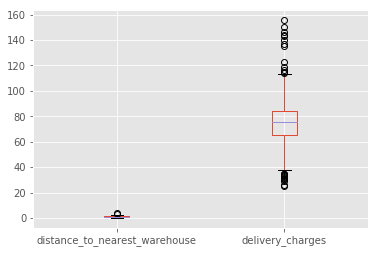

In [1131]:
# first subset the relative column ---- Plot 1
lean_outlier_df = outlier_data[['distance_to_nearest_warehouse','delivery_charges']]
# generate box plot
lean_outlier_df.boxplot()

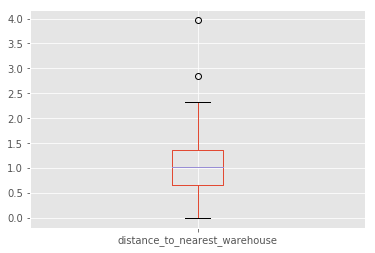

In [1132]:
# check weird distance ----- Plot 2
outlier_data.boxplot(column='distance_to_nearest_warehouse')

From above box plot it shows `delivery_charges` has alot of outliers.
Lets only plot the `delivery_charges`.

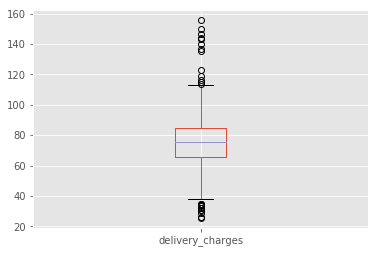

In [1133]:
# plot only for delivery charges -- Plot 3
outlier_data.boxplot(column='delivery_charges')

Lets check the value that below 40

In [1134]:
outlier_data[outlier_data['delivery_charges'] < 40] 

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
16,ORD461542,ID0613315545,2019-07-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Toshi...",16720,38.585,-37.814336,144.961568,10,15086.585,Winter,True,0.8471,great shape great shape,True
64,ORD047310,ID3132499903,2019-08-22,Nickolson,"[('Lucent 330S', 1), ('pearTV', 1)]",7540,39.050,-37.815342,144.963136,5,7202.050,Winter,True,0.6703,i wish it did more with internet searches. i ...,True
99,ORD131784,ID0060096189,2019-09-02,Nickolson,"[('Thunder line', 1), ('Lucent 330S', 1)]",3410,37.845,-37.818636,144.978866,0,3447.845,Spring,False,0.8192,works as expected! was a good deal.,True
139,ORD013245,ID6167247181,2019-07-17,Nickolson,"[('iAssist Line', 2), ('Olivia x460', 2), ('Ca...",7330,26.245,-37.820449,144.956688,10,6623.245,Winter,False,1.1498,one star phone died after one month of use wit...,False
174,ORD288278,ID0760180199,2019-07-18,Thompson,"[('Candle Inferno', 1), ('Lucent 330S', 1), ('...",7970,31.785,-37.822171,144.950074,5,7603.285,Winter,True,1.0898,broken wouldn't even turn on,False
188,ORD338296,ID0370750323,2019-05-27,Bakers,"[('Olivia x460', 1), ('Alcon 10', 2), ('Candle...",32605,33.120,-37.814208,144.985707,5,31007.870,Autumn,False,0.9599,"very helpful for playing music, setting alarms...",True
247,ORD456185,ID3313210940,2019-07-04,Nickolson,"[('Toshika 750', 2), ('iAssist Line', 1), ('Un...",20215,30.935,-37.818174,144.966928,0,20245.935,Winter,False,0.2354,five stars great phone for the price! love it!...,True
288,ORD110695,ID0643992404,2019-07-16,Bakers,"[('Universe Note', 2), ('Lucent 330S', 1), ('i...",8430,34.925,-37.824074,144.988758,10,7621.925,Winter,False,1.6674,works great looks and works great,True
322,ORD285378,ID0248746951,2019-04-12,Bakers,"[('Thunder line', 1), ('pearTV', 1)]",8490,33.795,-37.821793,144.990754,5,8099.295,Autumn,False,1.3710,great phone even greater price worked perfectl...,True
329,ORD119814,ID2188399786,2019-06-02,Nickolson,"[('Candle Inferno', 2), ('iAssist Line', 1), (...",12435,31.980,-37.812821,144.968026,25,9358.230,Winter,False,0.6566,great buy very happy with this alcon,True


<b> From the above table</b>, we can see the most record has very large `order_price` and from `Plot 1` and 'Plot 2' we can see that `distance_to_nearest_warehouse` does not has many outliers and the outliers almost `all > 2.5`. Which also means the records for `delivery_charges` < 40 is not relate to distance.
<br>But we can see these orders were all happend between `Autumn` & `Winter`.

<b>Is the `Autum` & `Winter` shipping price really that low?</b>

In [1135]:
# check Autumn' records
autumn

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD017660,ID0576860055,2019-05-16,Bakers,"[('Toshika 750', 1), ('iStream', 1)]",4470,80.49,-37.824694,144.988973,10,4103.49,Autumn,False,1.7262,one star im in the process of returning it bec...,False
1,ORD102444,ID6245731020,2019-03-01,Nickolson,"[('Candle Inferno', 1), ('iAssist Line', 1), (...",2805,80.41,-37.810662,144.976204,10,2604.91,Autumn,True,1.0593,help??? my carrier is tmobile and it says that...,True
7,ORD241410,ID0541122905,2019-03-29,Bakers,"[('Thunder line', 1), ('pearTV', 1), ('Olivia ...",19580,66.74,-37.802745,145.009465,15,16709.74,Autumn,True,1.4895,one star horrible,False
13,ORD268364,ID6167191735,2019-05-23,Nickolson,"[('iAssist Line', 2), ('iStream', 2)]",4750,77.21,-37.815592,144.966594,25,3639.71,Autumn,True,0.4235,great phone for the price. just a great phone ...,True
24,ORD118456,ID1982439988,2019-04-22,Bakers,"[('Olivia x460', 1), ('Lucent 330S', 2), ('Can...",4545,80.91,-37.815153,145.006058,25,3489.66,Autumn,True,1.1117,fast delivery. good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,ORD119315,ID1953969337,2019-05-22,Thompson,"[('Olivia x460', 2), ('iStream', 2)]",2750,79.87,-37.806073,144.960031,25,2142.37,Autumn,True,1.3562,nice phone works amazing. hooked up to cricket...,True
474,ORD456880,ID4315827377,2019-05-02,Bakers,"[('Lucent 330S', 1), ('iAssist Line', 1)]",3455,67.64,-37.820933,144.998736,15,3004.39,Autumn,True,1.2558,"one star el pedido nunca me llego, y nadie me ...",False
476,ORD179106,ID0331417007,2019-03-25,Bakers,"[('Toshika 750', 2), ('Lucent 330S', 2), ('pea...",24020,68.00,-37.821704,145.009534,25,18083.00,Autumn,True,1.8111,first time got damaged product i got my phone ...,False
481,ORD194646,ID0364850701,2019-03-12,Bakers,"[('Alcon 10', 2), ('Candle Inferno', 2), ('Luc...",23400,67.21,-37.805579,144.981317,10,21127.21,Autumn,False,1.3189,"works great with all the digico stuff, like ca...",True


In [1136]:
# get mean value
np.mean(autumn.delivery_charges)

75.13479166666667

In [1137]:
# check Winter' records
winter

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
28,ORD128229,ID4326586172,2019-07-07,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ol...",4680,68.95,-37.800770,144.957410,0,4748.95,Winter,False,1.6071,best phone for the money love my phone.,True
33,ORD100687,ID0702376274,2019-06-26,Thompson,"[('Lucent 330S', 2), ('Alcon 10', 2)]",20360,78.21,-37.805154,144.941196,10,18402.21,Winter,True,0.9836,one of the best worked for what i needed and w...,True
35,ORD025988,ID0767730103,2019-08-26,Nickolson,"[('pearTV', 2), ('Lucent 330S', 2), ('Thunder ...",19440,81.38,-37.804576,144.970563,15,16605.38,Winter,True,1.5631,as good as new! love the phone. looks and perf...,True
43,ORD356888,ID1497170573,2019-06-04,Bakers,"[('iStream', 1), ('Universe Note', 1), ('Candl...",4460,69.51,-37.823615,144.990226,25,3414.51,Winter,False,1.5786,one of the best ! still one of my favorite pho...,True
44,ORD424202,ID4633638458,2019-06-27,Thompson,"[('pearTV', 1), ('Lucent 330S', 1), ('iStream'...",7840,78.38,-37.806426,144.943992,15,6742.38,Winter,True,0.7462,it was in better shape than i expected. it was...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,ORD415308,ID0634779523,2019-08-16,Thompson,"[('pearTV', 1), ('Alcon 10', 2), ('Candle Infe...",25070,75.69,-37.813161,144.938615,0,25145.69,Winter,True,0.7455,note 8 is great grest new phone at a good price,True
477,ORD316106,ID3222703093,2019-07-10,Thompson,"[('Alcon 10', 2), ('Lucent 330S', 2), ('Toshik...",24680,79.13,-37.801785,144.947807,15,21057.13,Winter,True,1.2138,great phone great value everything i needed at...,True
484,ORD101720,ID2241718027,2019-07-06,Bakers,"[('Alcon 10', 2), ('Universe Note', 1), ('Luce...",23805,80.86,-37.811683,145.012088,0,23885.86,Winter,True,1.4943,great phone!!! this cellphone was a gift for m...,True
491,ORD300058,ID3555802207,2019-06-07,Thompson,"[('iAssist Line', 1), ('Alcon 10', 2), ('Thund...",24485,80.71,-37.805629,144.937234,10,22117.21,Winter,True,1.1675,received fast and great phone phone works grea...,True


In [1138]:
np.mean(winter.delivery_charges)

75.014375

Compare the two mean values with the outliers < 40. We find out that even in `Autumn` or `Winter` the shipping price still can not be that low. <br>
Therefore, We drop those records.

In [1139]:
outlier_data.drop(outlier_data[outlier_data['delivery_charges'] < 40].index, inplace = True) 
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       484 non-null    object 
 1   customer_id                    484 non-null    object 
 2   date                           484 non-null    object 
 3   nearest_warehouse              484 non-null    object 
 4   shopping_cart                  484 non-null    object 
 5   order_price                    484 non-null    int64  
 6   delivery_charges               484 non-null    float64
 7   customer_lat                   484 non-null    float64
 8   customer_long                  484 non-null    float64
 9   coupon_discount                484 non-null    int64  
 10  order_total                    484 non-null    float64
 11  season                         484 non-null    object 
 12  is_expedited_delivery          484 non-null    boo

Now, we check the records that carry the value greater than the maximum `maxi`

In [1140]:
outlier_data[outlier_data['delivery_charges'] > maxi]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
98,ORD073879,ID0846547079,2019-11-27,Nickolson,"[('Alcon 10', 2), ('pearTV', 2), ('Lucent 330S...",32610,144.075,-37.820163,144.968664,25,24601.575,Spring,True,0.1912,good display and has a face id (slower than al...,True
117,ORD451413,ID0634783955,2019-08-12,Thompson,"[('iStream', 2), ('pearTV', 2), ('iAssist Line...",17605,114.645,-37.813333,144.937581,15,15078.895,Winter,True,0.8376,four stars this item excellent not like new.th...,True
196,ORD191368,ID1224869051,2019-09-21,Thompson,"[('Candle Inferno', 2), ('Universe Note', 1), ...",10620,149.940,-37.813400,144.941019,10,9707.940,Spring,True,0.5382,love these guys they work so great,True
234,ORD101394,ID4716795678,2019-05-02,Thompson,"[('Toshika 750', 1), ('Universe Note', 2), ('i...",13445,118.575,-37.818835,144.953282,0,13563.575,Autumn,True,0.8769,excellent barry recived the order one day afte...,True
259,ORD345318,ID5402876143,2019-12-04,Nickolson,"[('Candle Inferno', 1), ('Thunder line', 2), (...",13325,135.465,-37.819443,144.976809,0,13460.465,Summer,True,0.6452,five stars thanks,True
309,ORD372059,ID0578077696,2019-11-28,Thompson,"[('pearTV', 2), ('Olivia x460', 2), ('Thunder ...",19430,136.725,-37.819411,144.932424,5,18595.225,Spring,True,1.4904,blacklisted tried to trade in the phone to oli...,False
313,ORD421510,ID0709970691,2019-06-28,Thompson,"[('iStream', 1), ('pearTV', 2), ('Candle Infer...",13630,116.160,-37.815446,144.935647,15,11701.660,Winter,True,1.0508,good thanks good thanks,True
400,ORD313294,ID0846571197,2019-09-18,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('...",10035,142.920,-37.818375,144.968757,25,7669.170,Spring,True,0.0740,great alcon for the price. i like the battery ...,True
401,ORD282876,ID5513111793,2019-02-15,Nickolson,"[('iAssist Line', 2), ('Lucent 330S', 2), ('Th...",11270,146.550,-37.821240,144.957473,0,11416.550,Summer,True,1.1021,"good gift for my gf nice, clean, gorgeous colo...",True
456,ORD049829,ID0250933640,2019-11-27,Bakers,"[('iStream', 2), ('Olivia x460', 1)]",1525,122.865,-37.823938,145.001427,10,1495.365,Spring,False,1.6448,bought this for my 8 year old in place of a na...,True


In [1141]:
print(np.mean(spring.delivery_charges),np.mean(summer.delivery_charges))
print(maxi,mini)

76.0204347826087 75.06192307692308
113.42125000000001 36.45124999999999


- From the above output we found that numer 234th row was happend in `Autumn` and has very large `delivery_charges` but not has significant distance. 
<br> The row 313 and 177 was happend in `Winter` and has large `delivery_charges` but not has significant distance.
- So these records are not unusual and we dont want to keep it.
<br>
- The rest of the reault are happend between in `Summer` and `Spring`, we know that Christmas days is in the Summer so the delivery charge may be higher during that period. 
- But the shipping price(not within the Christmas time) shouldnt has too much different compare to maximum value.
- So we will drop the reocrds that happend in Spring and Summer but not within the Christmas time(assume to November and December)

In [1142]:
# drop 234,313,117
outlier_data.drop(234, inplace = True)
outlier_data.drop(313, inplace = True)
outlier_data.drop(117, inplace = True)

In [1143]:
maxi_df = outlier_data[(outlier_data['delivery_charges']  > maxi)]
maxi_df['date']

98     2019-11-27
196    2019-09-21
259    2019-12-04
309    2019-11-28
400    2019-09-18
401    2019-02-15
456    2019-11-27
465    2019-02-19
487    2019-11-22
498    2019-10-02
Name: date, dtype: object

In [1144]:
# Drop not within the Christmas time
outlier_data.drop(196, inplace = True)
outlier_data.drop(400, inplace = True)
outlier_data.drop(401, inplace = True)
outlier_data.drop(465, inplace = True)

In [1145]:
outlier_data[outlier_data['delivery_charges'] > maxi]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
98,ORD073879,ID0846547079,2019-11-27,Nickolson,"[('Alcon 10', 2), ('pearTV', 2), ('Lucent 330S...",32610,144.075,-37.820163,144.968664,25,24601.575,Spring,True,0.1912,good display and has a face id (slower than al...,True
259,ORD345318,ID5402876143,2019-12-04,Nickolson,"[('Candle Inferno', 1), ('Thunder line', 2), (...",13325,135.465,-37.819443,144.976809,0,13460.465,Summer,True,0.6452,five stars thanks,True
309,ORD372059,ID0578077696,2019-11-28,Thompson,"[('pearTV', 2), ('Olivia x460', 2), ('Thunder ...",19430,136.725,-37.819411,144.932424,5,18595.225,Spring,True,1.4904,blacklisted tried to trade in the phone to oli...,False
456,ORD049829,ID0250933640,2019-11-27,Bakers,"[('iStream', 2), ('Olivia x460', 1)]",1525,122.865,-37.823938,145.001427,10,1495.365,Spring,False,1.6448,bought this for my 8 year old in place of a na...,True
487,ORD499928,ID0144720226,2019-11-22,Thompson,"[('Alcon 10', 2), ('Lucent 330S', 2), ('Olivia...",22810,155.520,-37.819607,144.956317,5,21825.020,Spring,True,1.1212,great customer service! love my phone. perfect...,True
498,ORD333457,ID0260907403,2019-10-02,Bakers,"[('iAssist Line', 2), ('Universe Note', 2)]",11350,113.810,-37.825101,145.013402,0,11463.810,Spring,True,2.3195,works on verizon worked perfectly with verizon...,True


# The above outputs will be the only outliers we choose to keep

In [1146]:
dirty_data.to_csv('31268102_dirty_data_solution.csv')
missing_data.to_csv('31268102_missing_data_solution.csv')
outlier_data.to_csv('31268102_outlier_data_solution.csv')